## Import the packages for future use

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from PIL import Image as pil_image
from keras.applications.vgg16 import VGG16
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os, shutil, glob, os.path
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import torch

## Set the model, but don't suggest user to change it.

In [ ]:
image.LOAD_TRUNCATED_IMAGES = True
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


## The input and output path, user can change it freely

In [ ]:
imdir = '/content/data'
targetdir = r"/content/result"

## Extract the feature to the list

In [ ]:
filelist = glob.glob(os.path.join(imdir, '*.png'))
# filelist.sort()
featurelist = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

## Do the PCA to reduce the dismension of matrix, I suggest user set n_digits between 10-20

In [ ]:
n_digits=10

pca = PCA(n_components=n_digits).fit_transform(featurelist)

## Do the Kmeans training, user can change the number_clusters freely


In [ ]:
number_clusters=27

kmeans = KMeans(n_init=35, n_clusters=number_clusters, random_state=0, tol=0.00001)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=27, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

## Save the image and the label to target location

In [ ]:
# Copy images renamed by cluster
# Check if target dir exists
try:
    os.makedirs(targetdir)
except OSError:
    pass
# Copy with cluster name
print("\n")
for i, m in enumerate(kmeans.labels_):
    print("    Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir +'\\'+ str(m) + "_" + str(i) + ".jpg")

## If user want to see the inertia for a specific range of number_clusters, they can use this loop to generate a graph. User can change the range freely.

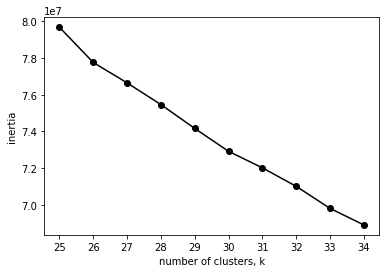

In [ ]:
ks = range(25, 35)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca)
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Draw the 2D graph of clustering, user can change number_clusters freely 

In [ ]:
n_digits=2

pca = PCA(n_components=n_digits).fit_transform(featurelist)

number_clusters=27

kmeans = KMeans(n_clusters=number_clusters, random_state=0)
kmeans.fit(pca)
label = kmeans.fit_predict(pca)

## draw the 2D graph below, user don't need to change any thing

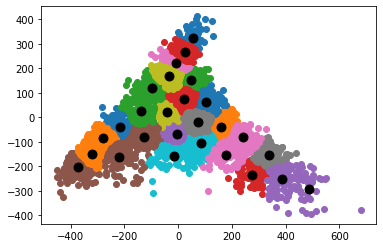

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:

for i in u_labels:
    plt.scatter(pca[label == i , 0] , pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "k")
fig = plt.figure(figsize=(20,20))
plt.show()


## Preparing the data for 3D graph, user don't need to change anything.

In [ ]:
n_digits=3
tri = PCA(n_components=n_digits).fit_transform(featurelist)
list1 = label.tolist()
list2 = [[int(item) for item in list1]]
label = np.array(list2)
d3=np.concatenate((tri, label.T), axis=1)
d3 = d3[0:4000]
label = label[0:4000]
list1 = label.tolist()
list1=label[0]
list1 = list1.tolist()

## plot the 3D graph, user don't need to change anything.

In [ ]:
import plotly.graph_objects as go


# Helix equation
t = np.linspace(0, 20, 100)
x, y, z = d3[:,0], d3[:,1], d3[:,2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=list1,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.7
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()